In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
user_data=pd.read_csv('/Users/dmitry/Downloads/3_user_data.csv')
logs=pd.read_csv('/Users/dmitry/Downloads/3_logs.csv')

In [113]:
user_data.describe().round(2)

,client,age
count,2954.00,2954.00
mean,50767.89,44.20
std,28800.51,14.25
min,40.00,20.00
25%,25639.50,32.00
50%,51569.50,44.00
75%,75963.25,56.00
max,99973.00,69.00


In [114]:
#how many unique values are there in variable "platform"?

In [115]:
logs['platform'].nunique()

3

In [116]:
#which client has made the largest number of successful operations?
#If more than 1, sort them by ID

In [117]:
most_op=logs.query('success==True').groupby(['client'],as_index=False).count(). \
sort_values('time',ascending=False)
most_op_var=most_op['time'].max()
most_op_ids=most_op.query('time==@most_op_var').sort_values('client', \
                                                           ascending=False)
print(most_op_ids)

      client  success  platform  time
2626   92584       41        41    41
2345   82563       41        41    41
2231   78349       41        41    41
1759   61473       41        41    41
1758   61468       41        41    41
1487   52870       41        41    41
1020   36165       41        41    41
810    28719       41        41    41
332    12179       41        41    41


In [118]:
#Which platform has the largest number of successful operations?

In [119]:
logs.query('success==True').groupby(['platform']).count(). \
sort_values('time',ascending=False)

,client,success,time
platform,,,
phone,2019,2019,2019
computer,1090,1090,1090
tablet,180,180,180


In [120]:
#Which platform is the most popular among premium clients?

In [121]:
logs=logs.merge(user_data,'inner',on='client')
logs.query('premium==True').groupby(['platform']).count()

,client,success,time,premium,age
platform,,,,,
computer,150,150,150,150,150
phone,246,246,246,246,246
tablet,24,24,24,24,24


In [122]:
#Visualize distribution of clients' age depending on the clients type

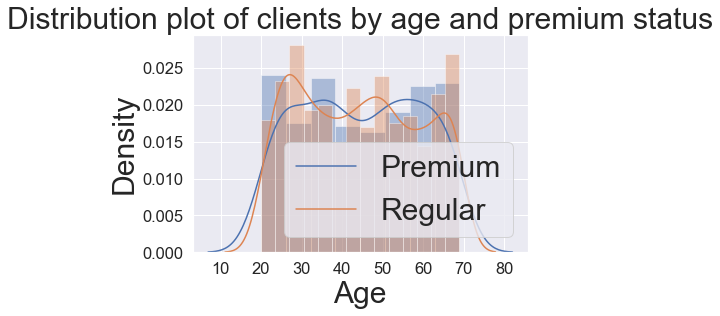

In [123]:
import warnings
warnings.filterwarnings('ignore')
a=sns.distplot(logs.query('premium==True').age)
b=sns.distplot(logs.query('premium==False').age)
plt.title('Distribution plot of clients by age and premium status',fontsize=30)
sns.set(rc={'figure.figsize':(20,8)})
plt.legend(labels=['Premium','Regular'],fontsize=30)
a.set_xlabel('Age',fontsize=30)
a.set_ylabel('Density',fontsize=30)
sns.set(font_scale=1)
plt.show()

In [124]:
#Visualize the distribution of successful operations
#X - number of successful operations
#Y - number of clients with this number of successful operations

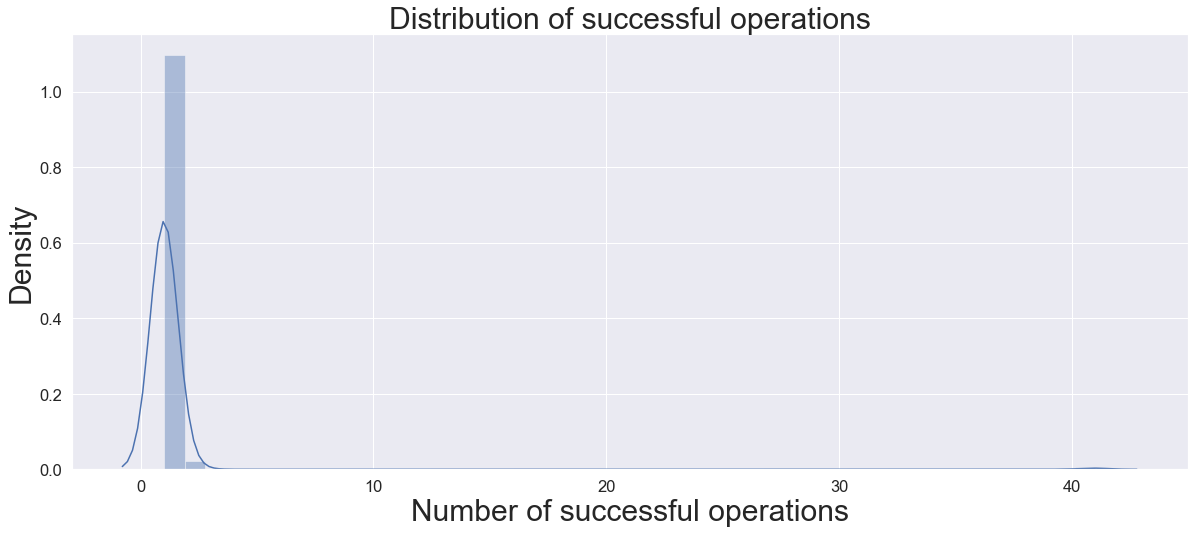

In [126]:
successful_logs=logs.query('success==True')
successful_logs=successful_logs.groupby(['client'],as_index=False).count()
c=sns.distplot(successful_logs.success)
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Distribution of successful operations',fontsize=30)
c.set_xlabel('Number of successful operations',fontsize=30)
c.set_ylabel('Density',fontsize=30)
sns.set(font_scale=1.5)
plt.show()

In [127]:
#Visualize number of successful operations on platform "Computer" by age

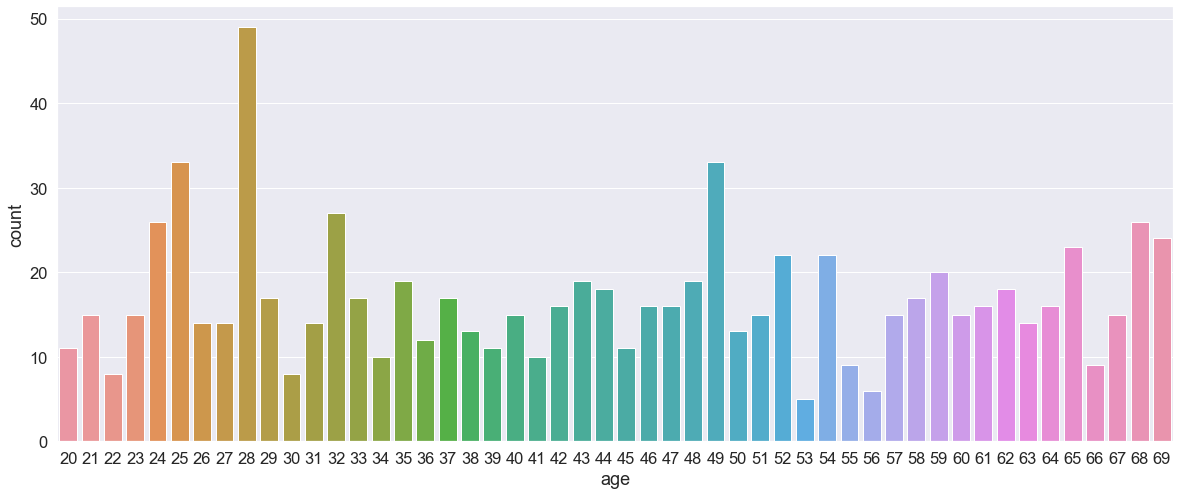

In [128]:
computer_logs=logs.query('success==True & platform=="computer"')
sns.countplot(data=computer_logs,x='age')
plt.show()